In [66]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np




In [67]:

!pip install nltk
!pip install wordcloud matplotlib
!pip install statsmodels




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [69]:

uber_df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/NYC%20UBER%20DATA.csv")

uber_filtered = uber_df[uber_df['PUBorough'].isin(['Manhattan', 'Brooklyn'])]

print("UBER DATA")
print(uber_filtered['PUBorough'].value_counts())
print(f"Total Uber records (Manhattan + Brooklyn): {len(uber_filtered):,}")

uber_filtered.to_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_bk_mn_filtered.csv")

subway_df = pd.read_csv(r"C:\Users\SHABI\OneDrive\Desktop\BA Dataset\subway_peak_filtered.csv")

subway_filtered = subway_df[subway_df['borough'].isin(['Manhattan', 'Brooklyn'])]

print("\nSUBWAY DATA")
print(subway_filtered['borough'].value_counts())
print(f"Total Subway records (Manhattan + Brooklyn): {len(subway_filtered):,}")

subway_filtered.to_csv(r"C:\Users\SHABI\OneDrive\Desktop\BA Dataset\subway_bk_mn_filtered.csv", index=False)



UBER DATA
PUBorough
Manhattan    36308
Brooklyn      8057
Name: count, dtype: int64
Total Uber records (Manhattan + Brooklyn): 44,365

SUBWAY DATA
borough
Brooklyn     250619
Manhattan    223881
Name: count, dtype: int64
Total Subway records (Manhattan + Brooklyn): 474,500


In [70]:

reviews = pd.read_csv(
    r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_reviews_without_reviewid.csv    ",
    engine='python',
    on_bad_lines='skip',         
    quoting=0                    
)

reviews.to_csv(
    r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_reviews_clean.csv",
    index=False
)

print(f"✅ Cleaned reviews saved: {len(reviews):,} records")


✅ Cleaned reviews saved: 12,000 records


In [71]:
reviews = pd.read_csv(r"C:\Users\SHABI\Downloads\uber_reviews_cleaned.csv")

reviews_sampled = reviews.sample(frac=0.10, random_state=42)


reviews_sampled.to_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_reviews_cleaned_sampled.csv", index=False)

print(f" Sampled reviews saved: {len(reviews_sampled):,} records")

 Sampled reviews saved: 1,200 records


In [72]:
df.to_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_reviews_ready.csv", index=False)


In [75]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/green_taxi_manhattan.csv", parse_dates=['lpep_pickup_datetime'])
df['Day_of_Week'] = df['lpep_pickup_datetime'].dt.day_name()
df['Trip_Count'] = 1



In [76]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/green_taxi_brooklyn.csv", parse_dates=['lpep_pickup_datetime'])
df['Day_of_Week'] = df['lpep_pickup_datetime'].dt.day_name()
df['Trip_Count'] = 1
df.to_csv("green_taxi_brroklyn_final.csv", index=False)

In [79]:


nltk.download('vader_lexicon')

df = pd.read_csv(
    "https://raw.githubusercontent.com/Prasema/BA_dataset/main/UBER_REVIEWS.csv",
    encoding='ISO-8859-1',
    on_bad_lines='skip',      # Skip problematic rows
    engine='python'
)



sid = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['Clean_content'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(label_sentiment)

sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

negative_keywords = df[df['Sentiment'] == 'Negative']['keywords_found']
all_keywords = []

for entry in negative_keywords.dropna():
    all_keywords.extend(str(entry).lower().split(','))

cleaned = [kw.strip() for kw in all_keywords if kw.strip()]
reason_counts = Counter(cleaned).most_common()

print("\nTop Reasons for Negative Feedback:")
for reason, count in reason_counts:
    print(f"{reason}: {count}")
output_path = r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/uber_reviews_with_sentiment.csv"

df.to_csv(output_path, index=False)
print("File saved successfully!")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHABI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Distribution:
 Sentiment
Positive    819
Negative    199
Neutral     182
Name: count, dtype: int64

Top Reasons for Negative Feedback:
driver: 79
cancel: 45
wait: 27
price: 17
location: 13
late: 9
support: 7
traffic: 3
pickup: 3
expensive: 3
fare: 3
cheap: 2
delay: 2
map: 2
navigation: 2
refund: 2
unsafe: 1
rude: 1
surge: 1
File saved successfully!


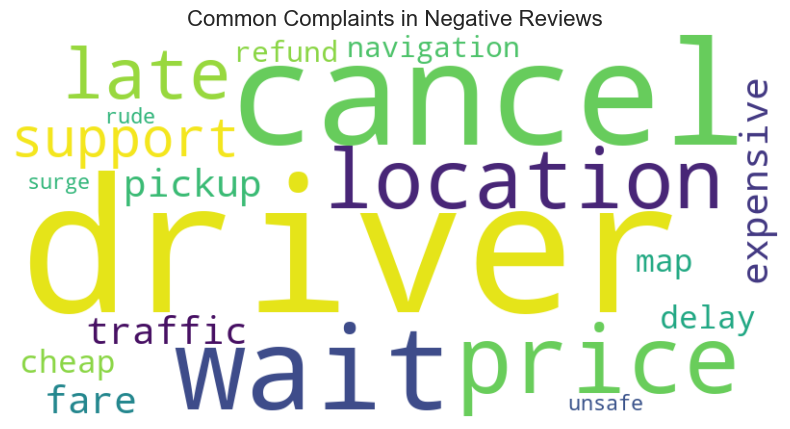

In [ ]:
negative_reviews = df[df['Sentiment'] == 'Negative']

keywords_text = ' '.join(negative_reviews['keywords_found'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Complaints in Negative Reviews", fontsize=16)
plt.show()

In [ ]:
print(df.columns)


Index(['userName', 'content', 'score', 'Clean_content', 'Review_Length',
       'keywords_found', 'keyword_count', 'sentiment_score', 'Sentiment'],
      dtype='object')


In [85]:

df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/UBER.csv")
print(df.columns.tolist())


['day_category', 'pickup_time', 'RatecodeID', 'PULocationID', 'PUBorough', 'PUZone', 'DOLocationID', 'DOBorough', 'DOZone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'fare_amount_bins', 'tip_amount', 'tip_amount_bins', 'payment_type', 'trip_duration', 'duration_bins', 'speed', 'speed_bins', 'Pickup_Datetime', 'Dropoff_Datetime', 'Pickup_Date_Month', 'Pickup_Hour', 'Duration_Trip', 'Type_Trip', 'Peak_Hour', 'Day_of_Week', 'Year_Date_Month', 'Right_PULocationID', 'Lookup_Zone', 'service_zone']


In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/UBER.csv", parse_dates=['Pickup_Datetime'])

df['Pickup_Hour'] = df['Pickup_Datetime'].dt.hour
df['Day_of_Week'] = df['Pickup_Datetime'].dt.day_name()

pivot = df.groupby(['Day_of_Week', 'Pickup_Hour']).size().unstack().fillna(0)
x = pivot.columns         # Hours
y = pivot.index           # Days
z = pivot.values          # Trip counts

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')])
fig.update_layout(title='3D Heatmap of Trips by Hour and Day', scene=dict(
    xaxis_title='Hour',
    yaxis_title='Day',
    zaxis_title='Trip Count'
))
fig.show()


In [ ]:
import plotly.graph_objects as go


df['Pickup_Hour'] = df['Pickup_Datetime'].dt.hour
df['Day_of_Week'] = df['Pickup_Datetime'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=day_order, ordered=True)

pivot = df.groupby(['Day_of_Week', 'Pickup_Hour']).size().unstack().fillna(0)
x = pivot.columns         # Hours
y = pivot.index           # Ordered Days
z = pivot.values          # Trip counts

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')])
fig.update_layout(
    title={
        'text': "3D Trip Demand Surface – Hour vs Day of Week (Uber NYC)",
        'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'
    },
    scene=dict(
        xaxis_title='Hour of Day (0–23)',
        yaxis_title='Day of Week',
        zaxis_title='Number of Trips',
        zaxis=dict(tickformat='d')
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


C:\Users\SHABI\AppData\Local\Temp\ipykernel_6032\3753419496.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

trip_flow = df.groupby(['PUZone', 'DOZone']).size().reset_index(name='count')
trip_flow = trip_flow.nlargest(10, 'count')

zones = list(pd.unique(trip_flow[['PUZone', 'DOZone']].values.ravel()))
zone_index = {zone: i for i, zone in enumerate(zones)}
trip_flow['source'] = trip_flow['PUZone'].map(zone_index)
trip_flow['target'] = trip_flow['DOZone'].map(zone_index)

norm = colors.Normalize(vmin=trip_flow['count'].min(), vmax=trip_flow['count'].max())
cmap = cm.get_cmap('YlGnBu')  

trip_flow['hex_color'] = trip_flow['count'].apply(lambda x: colors.to_hex(cmap(norm(x))))

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=zones,
        color="lightgrey"
    ),
    link=dict(
        source=trip_flow['source'],
        target=trip_flow['target'],
        value=trip_flow['count'],
        color=trip_flow['hex_color'],
        customdata=trip_flow[['PUZone', 'DOZone', 'count']].values,
        hovertemplate='From: %{customdata[0]}<br>To: %{customdata[1]}<br>Trips: %{customdata[2]}<extra></extra>'
    )
)])

fig.update_layout(
    title_text="Top 10 Uber Trip Flows – Gradient by Volume",
    font=dict(size=12),
    margin=dict(t=60, l=30, r=30, b=30)
)

fig.show()


C:\Users\SHABI\AppData\Local\Temp\ipykernel_12568\568659146.py:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



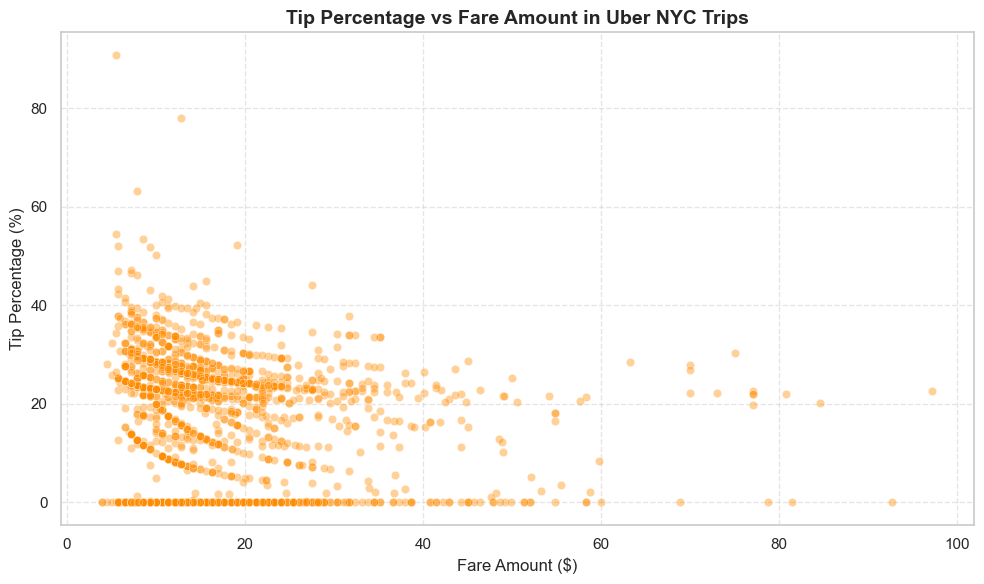

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df[df['fare_amount'] > 0]  
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100

df = df[(df['tip_percent'] >= 0) & (df['tip_percent'] <= 100)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='tip_percent', data=df, alpha=0.4, color='darkorange')

plt.title('Tip Percentage vs Fare Amount in Uber NYC Trips', fontsize=14, weight='bold')
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.ylabel('Tip Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\SHABI\AppData\Local\Temp\ipykernel_12568\3525419544.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\SHABI\AppData\Local\Temp\ipykernel_12568\3525419544.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




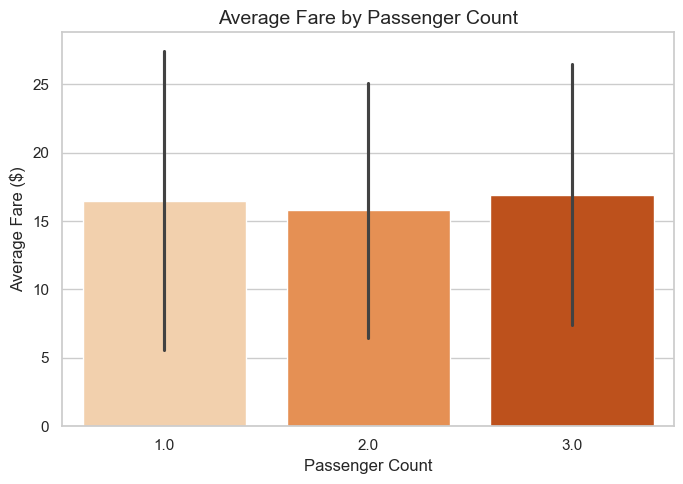

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.barplot(
    x='passenger_count',
    y='fare_amount',
    data=df,
    estimator='mean',
    ci='sd',  
    palette='Oranges'
)

plt.title('Average Fare by Passenger Count', fontsize=14)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.tight_layout()
plt.show()


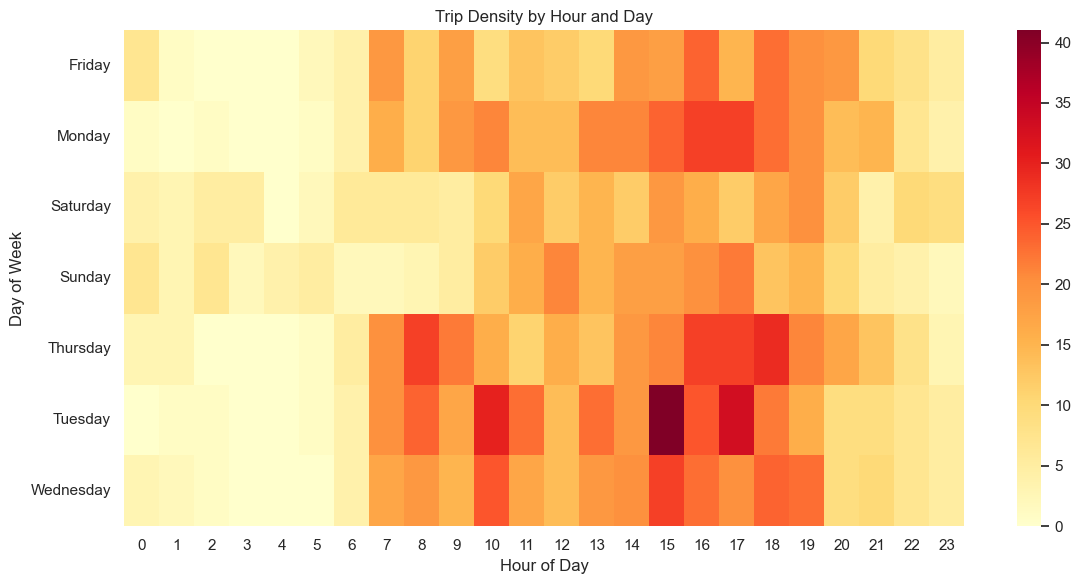

In [91]:
pivot = df.groupby(['Day_of_Week', 'Pickup_Hour']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Trip Density by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


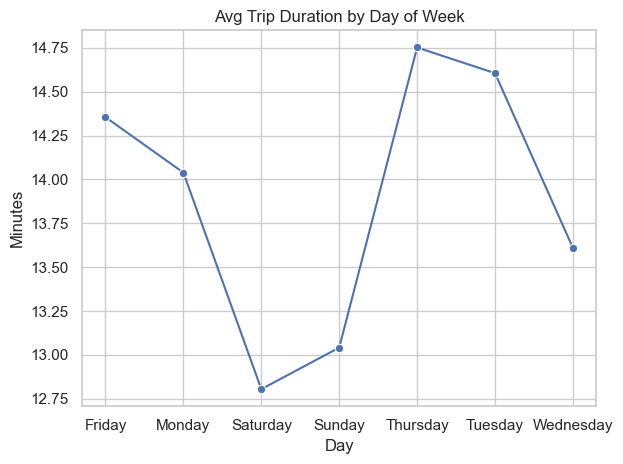

In [92]:
duration_trend = df.groupby('Day_of_Week')['trip_duration'].mean().reset_index()
sns.lineplot(data=duration_trend, x='Day_of_Week', y='trip_duration', marker='o')
plt.title('Avg Trip Duration by Day of Week')
plt.xlabel('Day')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/UBER.csv")

df = df[df['fare_amount'] < 200]  
anova_result = f_oneway(
    df[df['passenger_count'] == 1]['fare_amount'],
    df[df['passenger_count'] == 2]['fare_amount'],
    df[df['passenger_count'] == 3]['fare_amount']
)

print("ANOVA F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("✅ Significant difference in fare across passenger groups.")
else:
    print("❌ No significant difference in fare across passenger groups.")

ANOVA F-statistic: 0.3297628421833907
p-value: 0.719135356666618
❌ No significant difference in fare across passenger groups.


['day_category', 'pickup_time', 'RatecodeID', 'PULocationID', 'PUBorough', 'PUZone', 'DOLocationID', 'DOBorough', 'DOZone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'fare_amount_bins', 'tip_amount', 'tip_amount_bins', 'payment_type', 'trip_duration', 'duration_bins', 'speed', 'speed_bins', 'Pickup_Datetime', 'Dropoff_Datetime', 'Pickup_Date_Month', 'Pickup_Hour', 'Duration_Trip', 'Type_Trip', 'Peak_Hour', 'Day_of_Week', 'Year_Date_Month', 'Right_PULocationID', 'Lookup_Zone', 'service_zone']
                               PUZone  Cluster
0                          Bath Beach        1
1                             Bedford        0
2                    Bensonhurst East        2
3                    Bensonhurst West        2
4                        Bloomingdale        0
5                         Boerum Hill        0
6                      Brighton Beach        0
7                    Brooklyn Heights        0
8                         Brownsville        0
9      

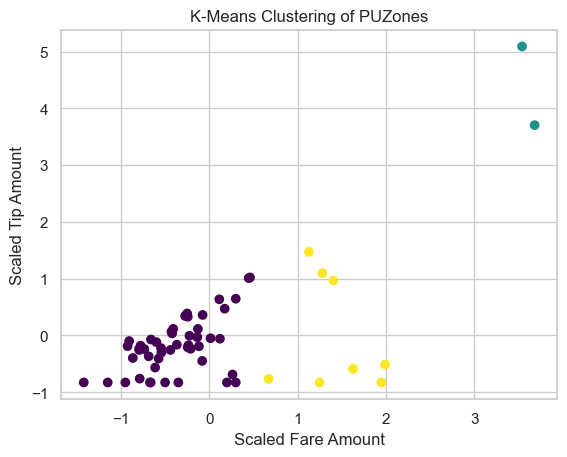

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/UBER.csv")  

print(df.columns.tolist())
features = ['fare_amount', 'tip_amount', 'Duration_Trip']
df_clean = df[['PUZone', 'Type_Trip'] + features].dropna()

zone_data = df_clean.groupby('PUZone')[features].mean().reset_index()
zone_data['Count'] = df_clean.groupby('PUZone').size().values

X = zone_data[features + ['Count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
zone_data['Cluster'] = kmeans.fit_predict(X_scaled)

print(zone_data[['PUZone', 'Cluster']])


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=zone_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of PUZones')
plt.xlabel('Scaled Fare Amount')
plt.ylabel('Scaled Tip Amount')
plt.show()

In [ ]:
def recommend_action(row):
    if row['Cluster'] == 0:
        return "High Demand – Focus Driver Allocation, Surge Pricing"
    elif row['Cluster'] == 1:
        return "Low Fare + Long Duration – Promote Ride Pooling"
    elif row['Cluster'] == 2:
        return "Low Tip Zones – Offer Incentives or Training"
    else:
        return "Needs Review"

zone_data['Recommendation'] = zone_data.apply(recommend_action, axis=1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/zone_cluster_recommendations.csv")
print(df.columns.tolist())

features = ['fare_amount', 'tip_amount', 'Duration_Trip']
X = zone_data[features]
y = zone_data['Recommendation']  

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)

['PUZone', 'fare_amount', 'tip_amount', 'Duration_Trip', 'Count', 'Cluster', 'Recommendation']


DecisionTreeClassifier(max_depth=4)

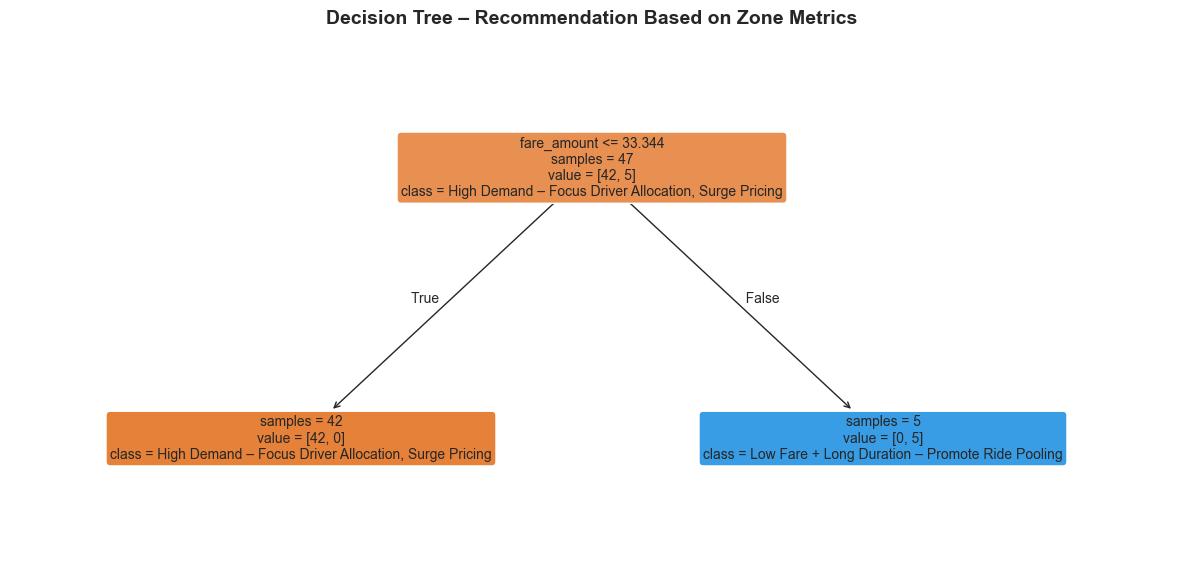

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=False
)
plt.title("Decision Tree – Recommendation Based on Zone Metrics", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

c:\Users\SHABI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



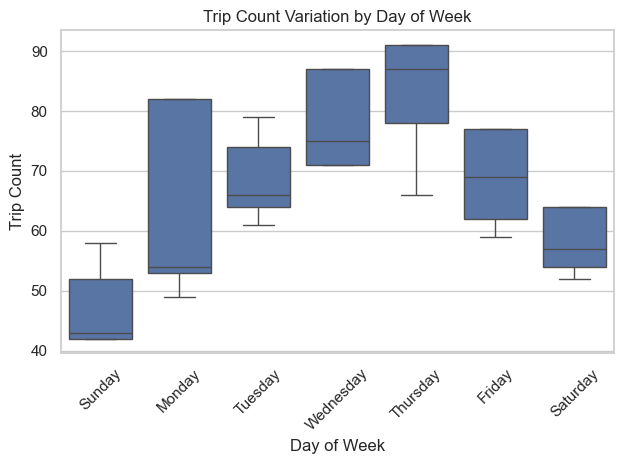

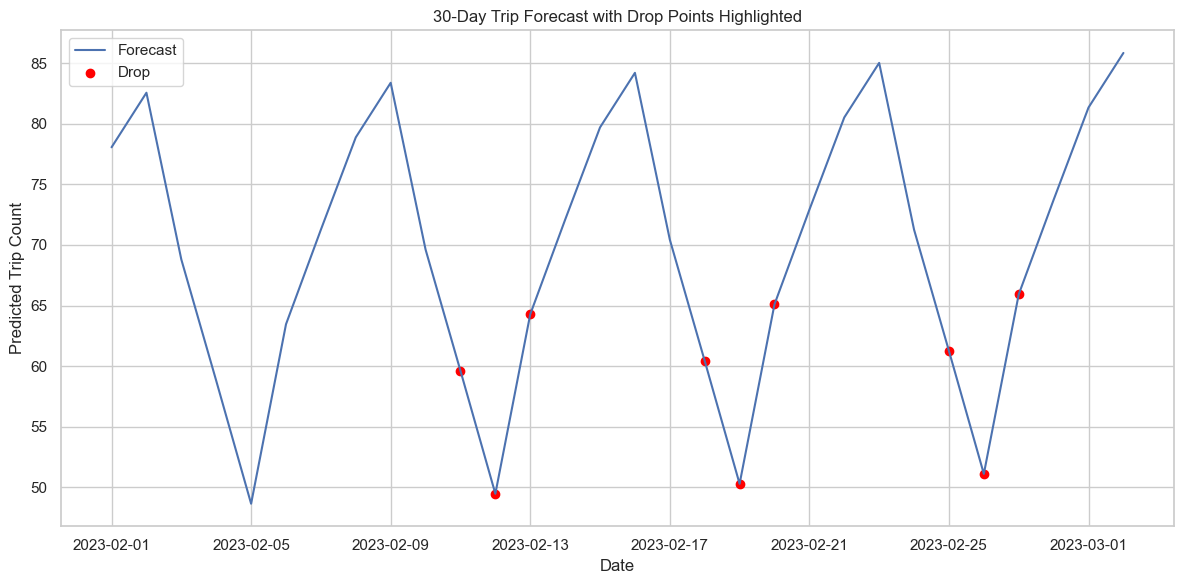

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib.ticker import MaxNLocator

df = pd.read_csv(r"https://raw.githubusercontent.com/Prasema/BA_dataset/refs/heads/main/UBER.csv")  
df['Year_Date_Month'] = pd.to_datetime(df['Year_Date_Month'])

daily_demand = df.groupby('Year_Date_Month').size().reset_index(name='Trips')

daily_demand.set_index('Year_Date_Month', inplace=True)

model = ExponentialSmoothing(daily_demand['Trips'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit()

forecast = fit.forecast(30)
forecast = forecast.reset_index()
forecast.columns = ['date', 'forecast']

forecast['is_dip'] = forecast['forecast'] < forecast['forecast'].rolling(7).mean()

df['date'] = pd.to_datetime(df['Year_Date_Month'])
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
df['week_number'] = df['date'].dt.isocalendar().week

sns.boxplot(x='day_of_week', y='Trips', data=daily_demand.reset_index().merge(df[['date', 'day_of_week']], left_on='Year_Date_Month', right_on='date'))
plt.title("Trip Count Variation by Day of Week")
plt.ylabel("Trip Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(forecast['date'], forecast['forecast'], label='Forecast')
plt.scatter(forecast[forecast['is_dip']]['date'], forecast[forecast['is_dip']]['forecast'], color='red', label='Drop')
plt.title("30-Day Trip Forecast with Drop Points Highlighted")
plt.xlabel("Date")
plt.ylabel("Predicted Trip Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()